In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib
import math

In [2]:
data = pd.read_csv("income.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [4]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

### Exploratory Data Analysis 

In [5]:
categorical_cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "income >50K"
]

In [6]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

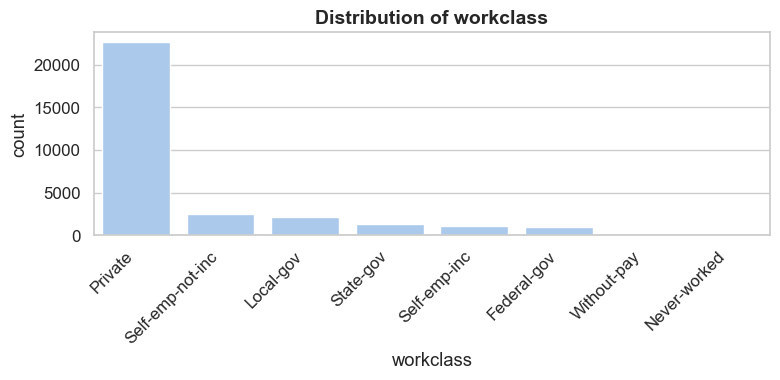

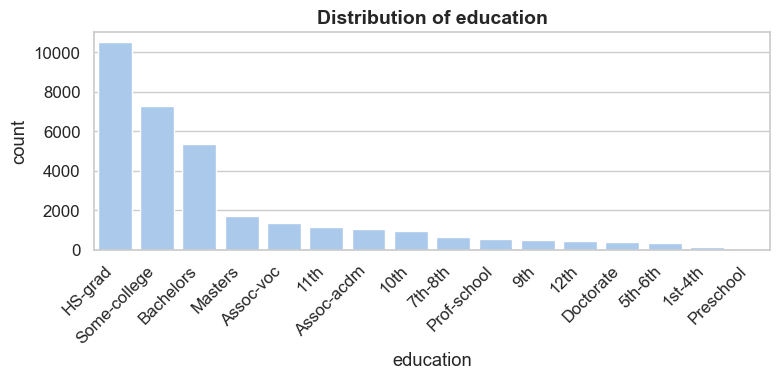

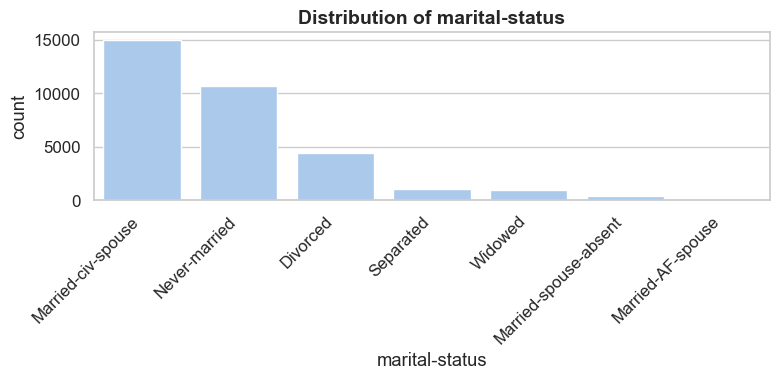

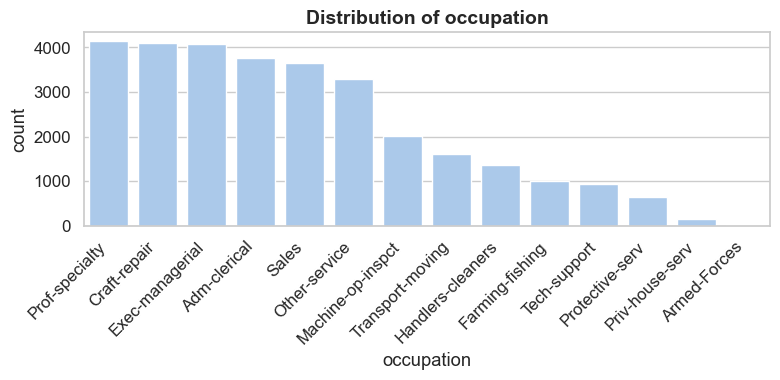

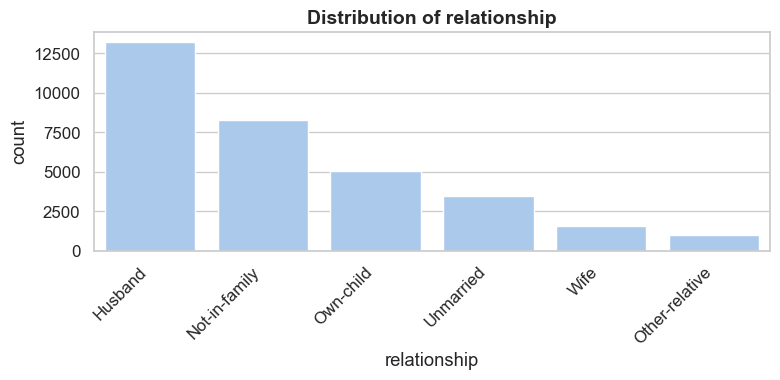

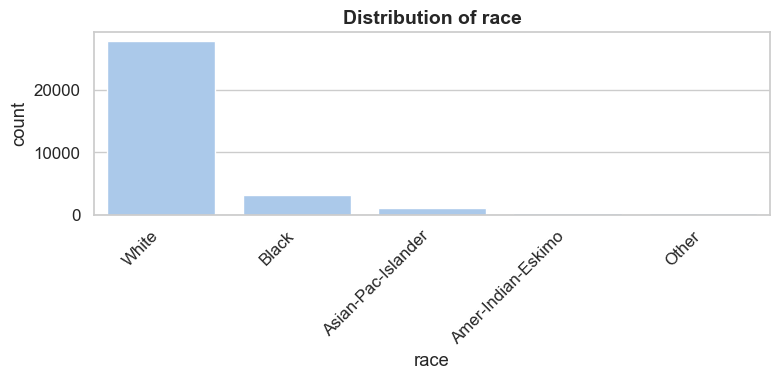

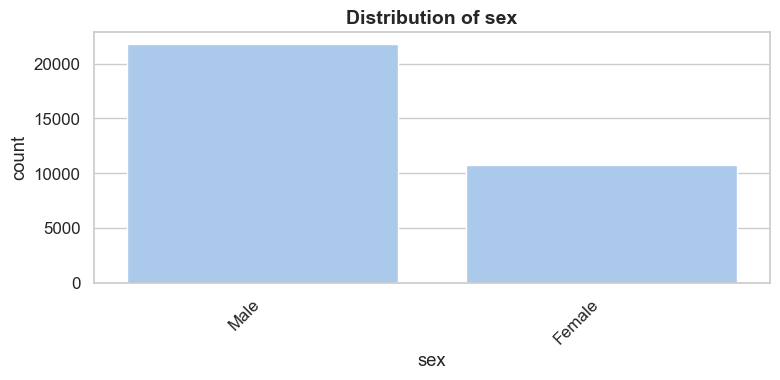

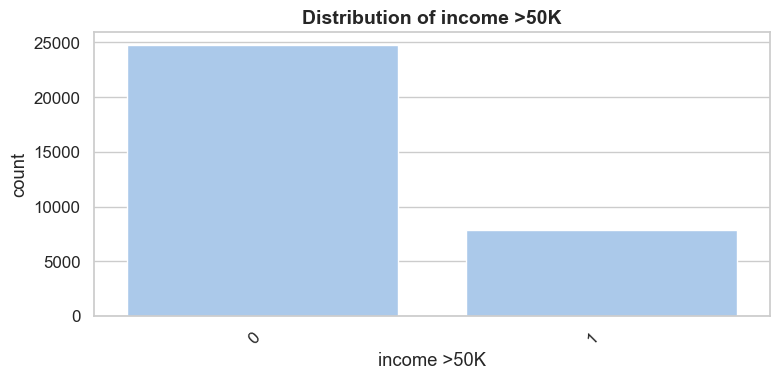

In [7]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Relationship with Target Variable (income >50K)

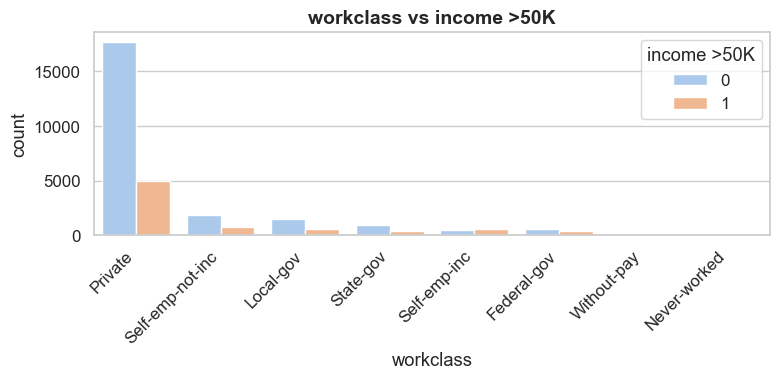

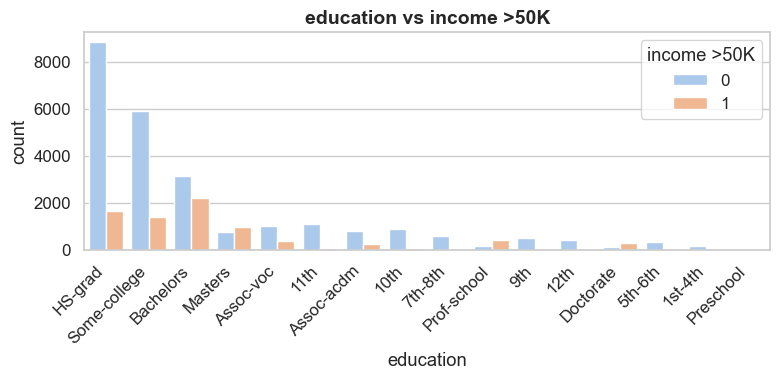

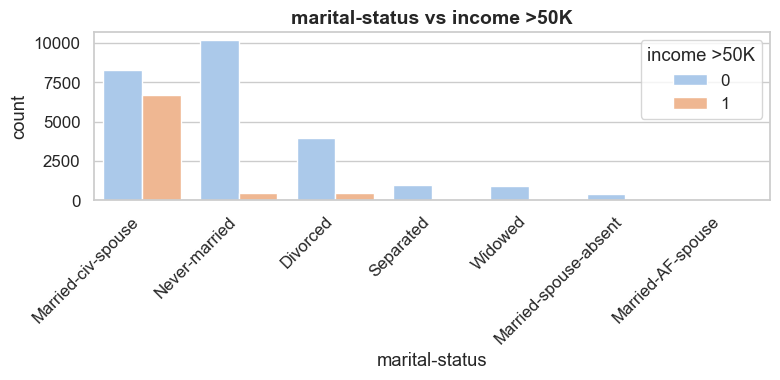

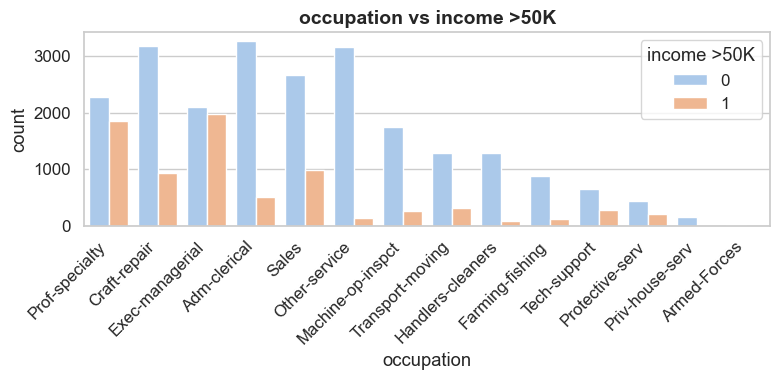

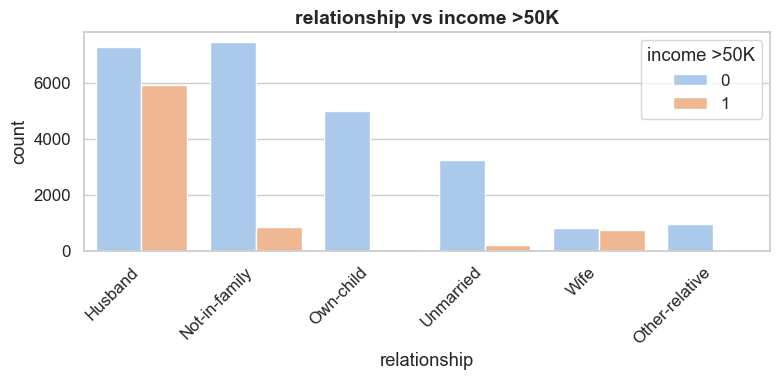

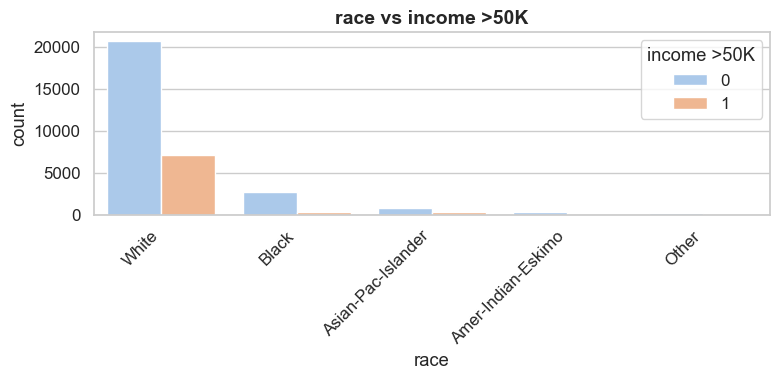

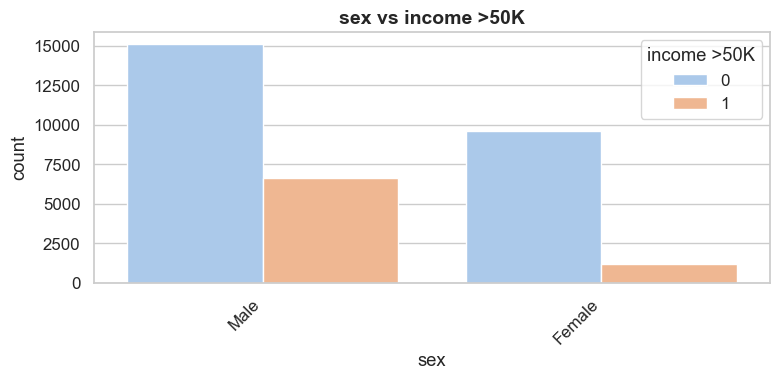

In [8]:
target = "income >50K"

for col in categorical_cols:
    if col != target:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data=data, x=col, hue=target, order=data[col].value_counts().index)
        plt.title(f"{col} vs {target}", fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Special Handling for High-Cardinality Columns (e.g. native-country)

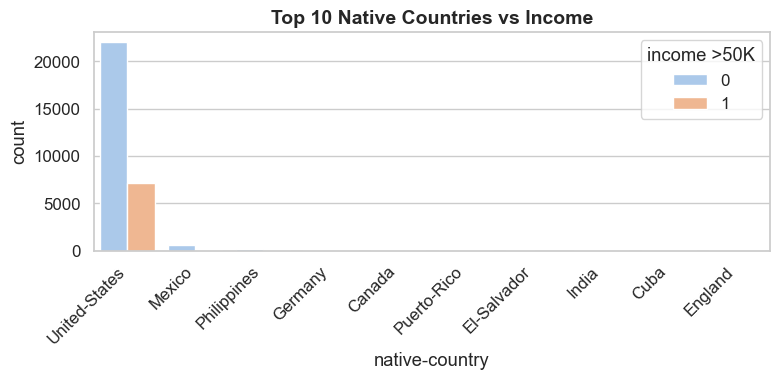

In [9]:
top_countries = data["native-country"].value_counts().nlargest(10).index

plt.figure(figsize=(8, 4))
sns.countplot(
    data=data[data["native-country"].isin(top_countries)],
    x="native-country",
    hue="income >50K",
    order=top_countries
)
plt.title("Top 10 Native Countries vs Income", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Percent Distribution by Category

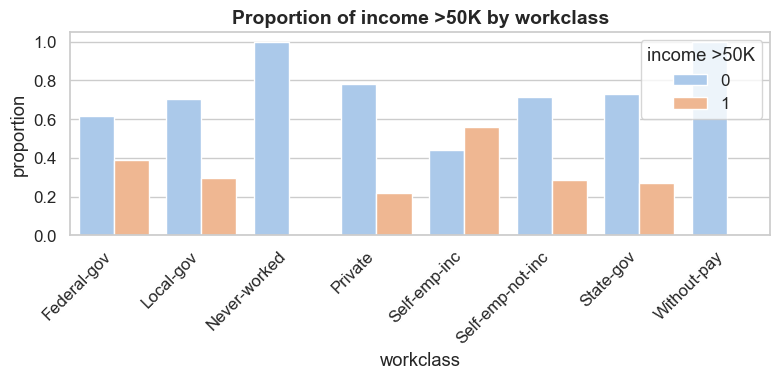

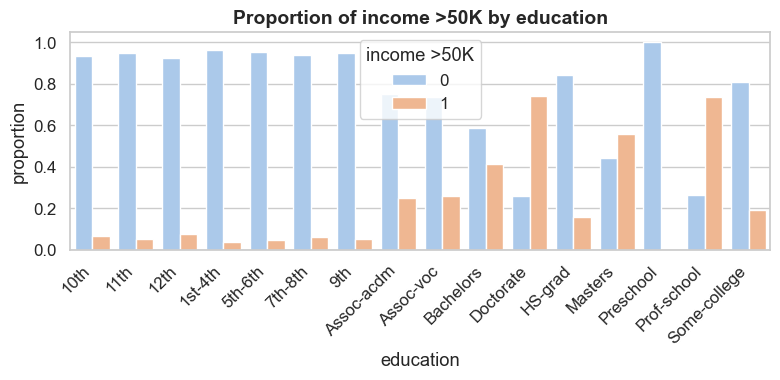

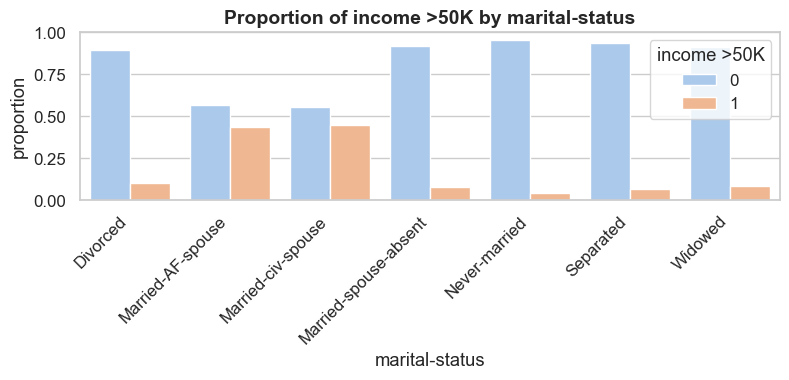

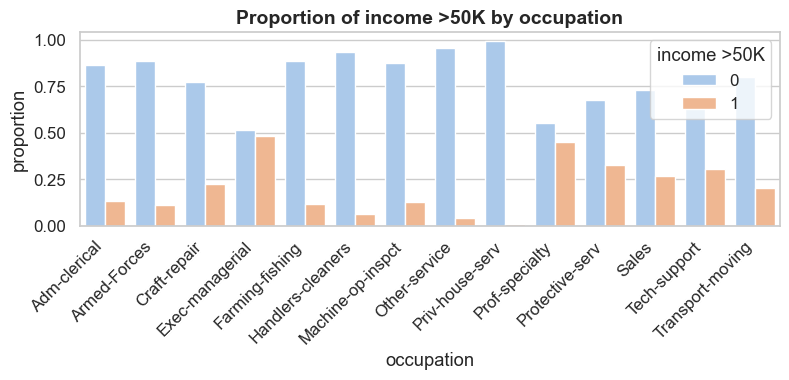

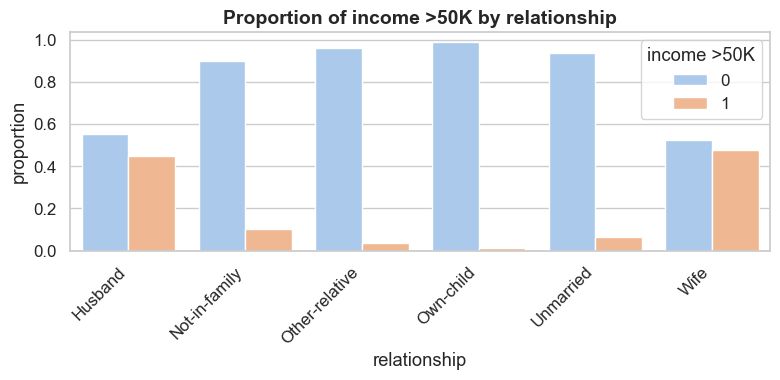

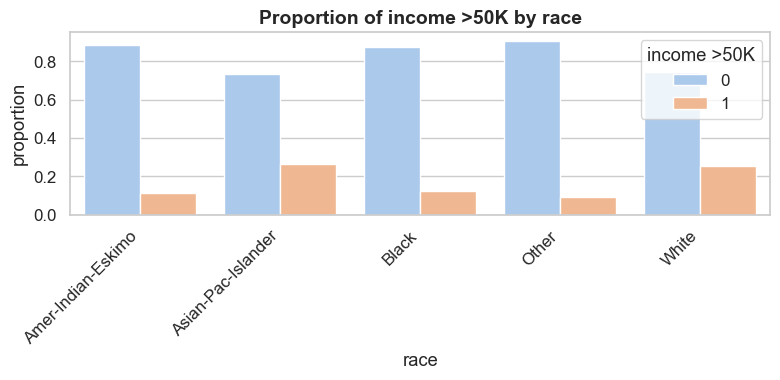

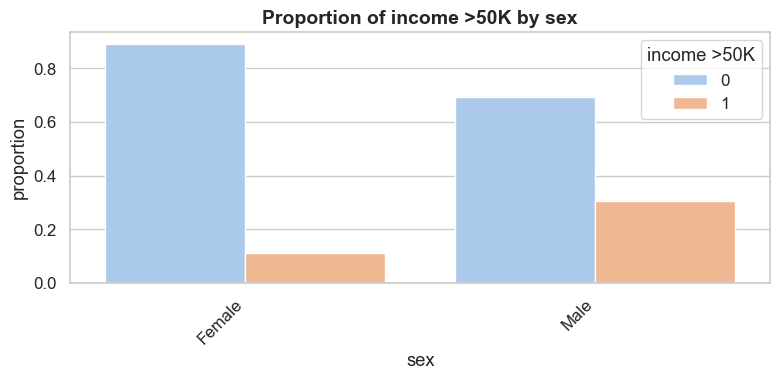

In [10]:
for col in categorical_cols:
    if col != target:
        plt.figure(figsize=(8, 4))
        prop_df = (
            data.groupby(col)[target]
            .value_counts(normalize=True)
            .rename("proportion")
            .reset_index()
        )
        sns.barplot(data=prop_df, x=col, y="proportion", hue=target)
        plt.title(f"Proportion of {target} by {col}", fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

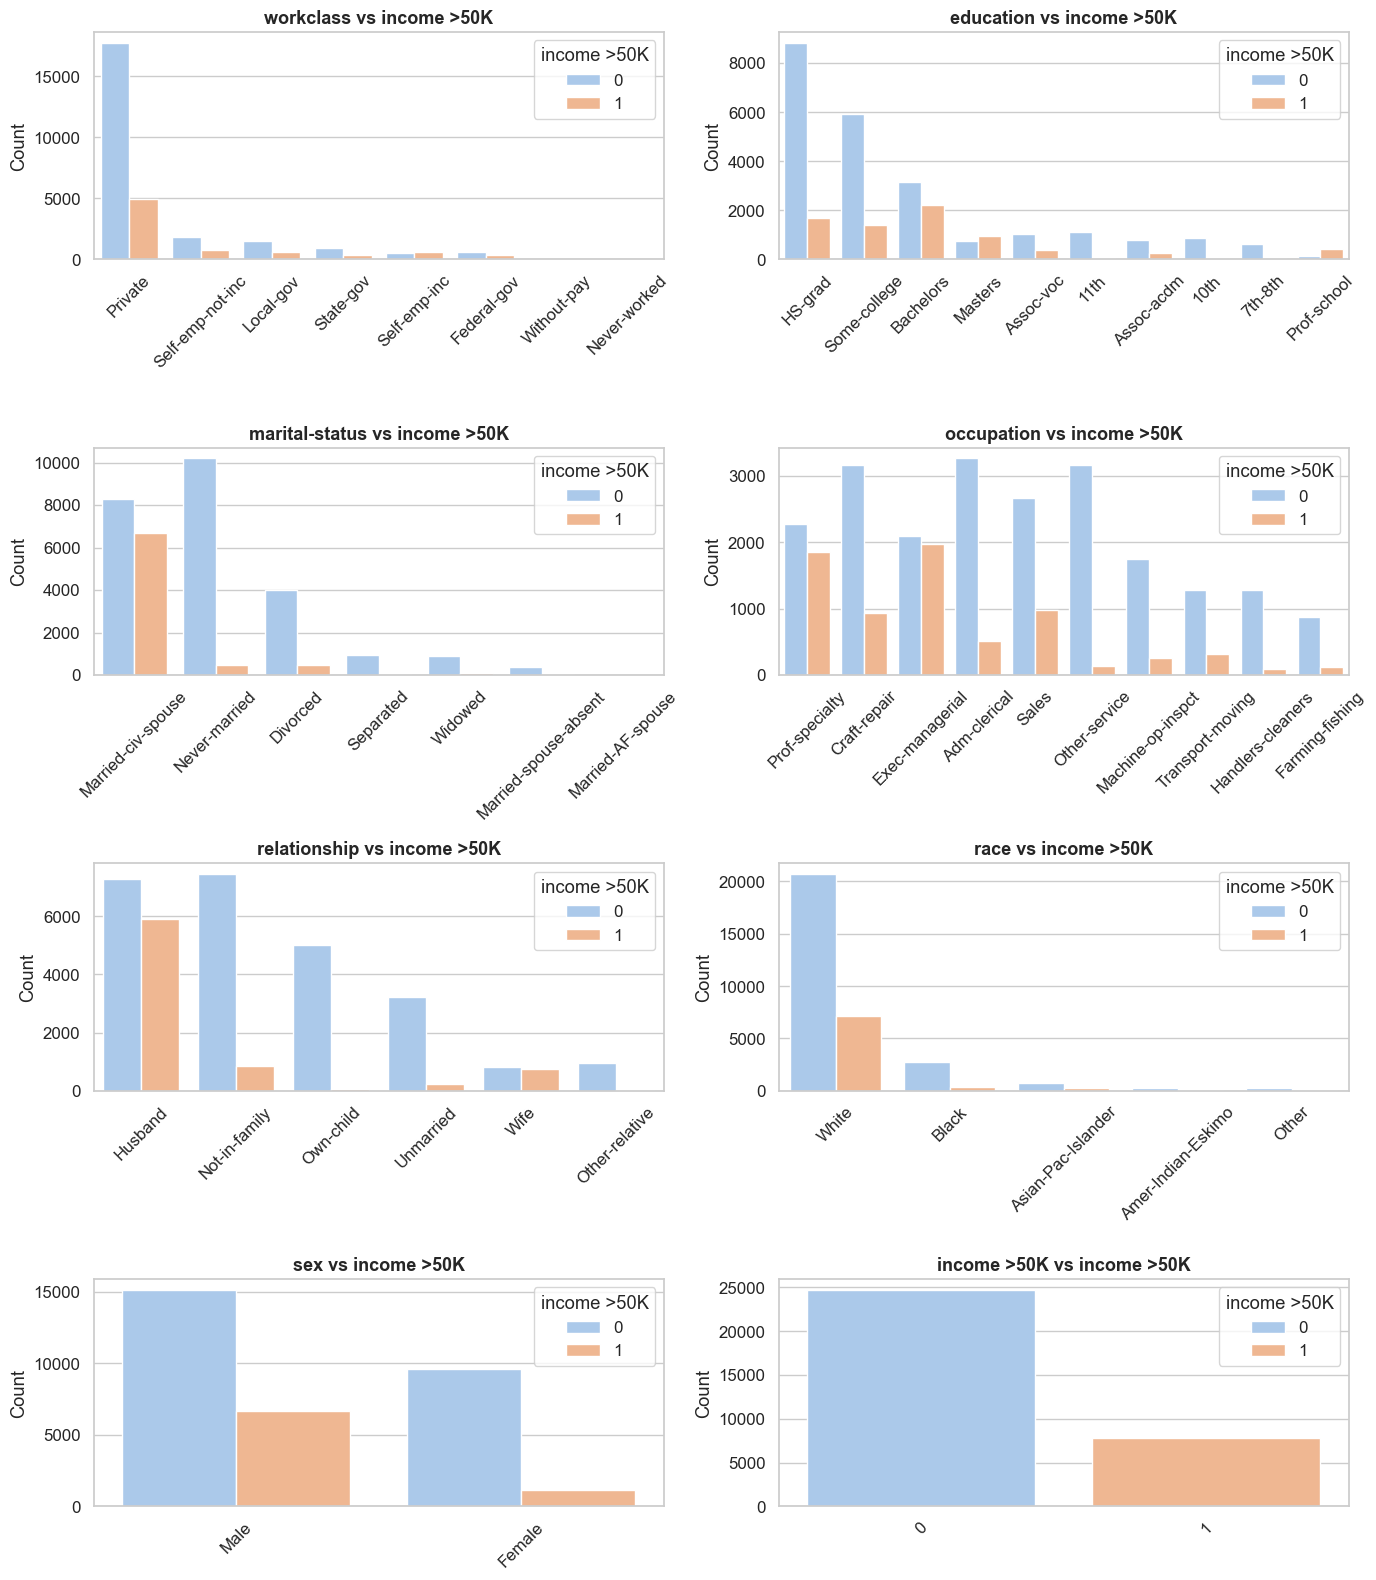

In [11]:
plot_type = "income"   

n_cols = 2  
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    if plot_type == "income":
        
        if data[col].nunique() > 10:
            top_vals = data[col].value_counts().nlargest(10).index
            temp_data = data[data[col].isin(top_vals)]
            sns.countplot(data=temp_data, x=col, hue=target, order=top_vals, ax=ax)
        else:
            sns.countplot(data=data, x=col, hue=target, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f"{col} vs {target}", fontsize=13, fontweight='bold')

    else:
        
        sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=13, fontweight='bold')

    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## check missing counts

In [12]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

## Relationship between Workclass and Occupation

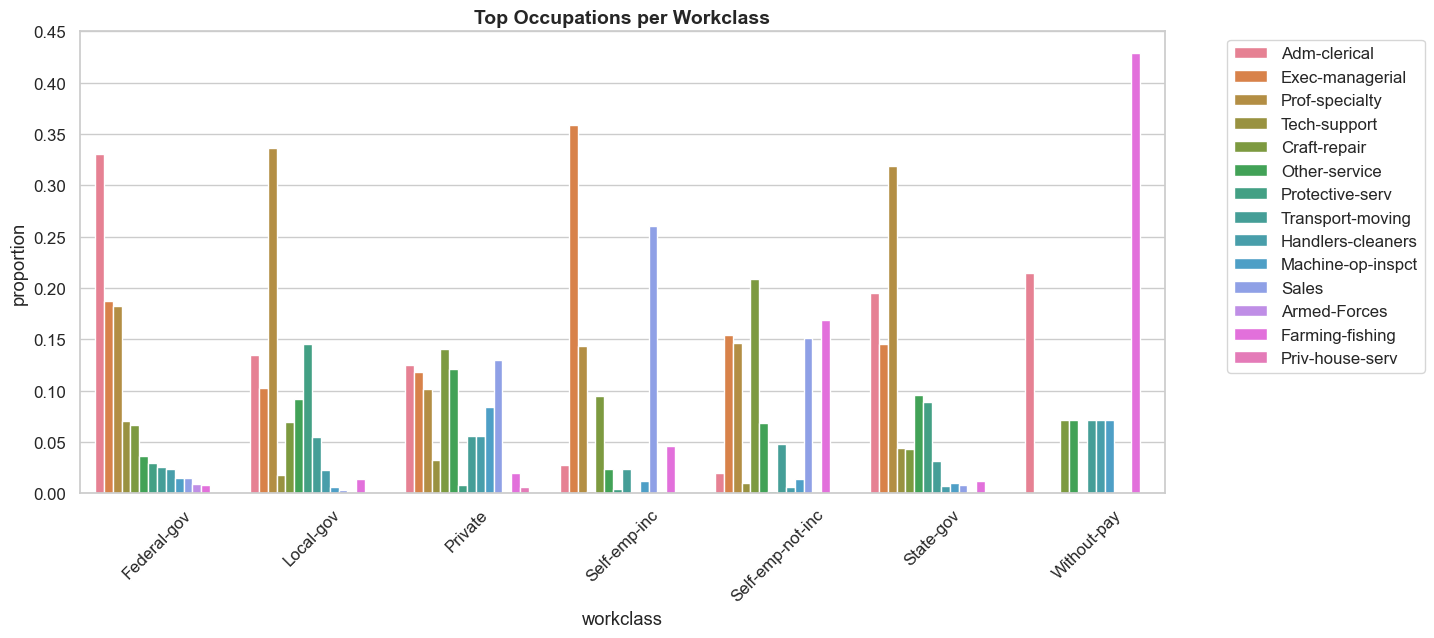

In [13]:
occupation_by_workclass = (
    data.groupby("workclass")["occupation"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=occupation_by_workclass,
    x="workclass",
    y="proportion",
    hue="occupation"
)
plt.title("Top Occupations per Workclass", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Native Country vs. Race / Workclass

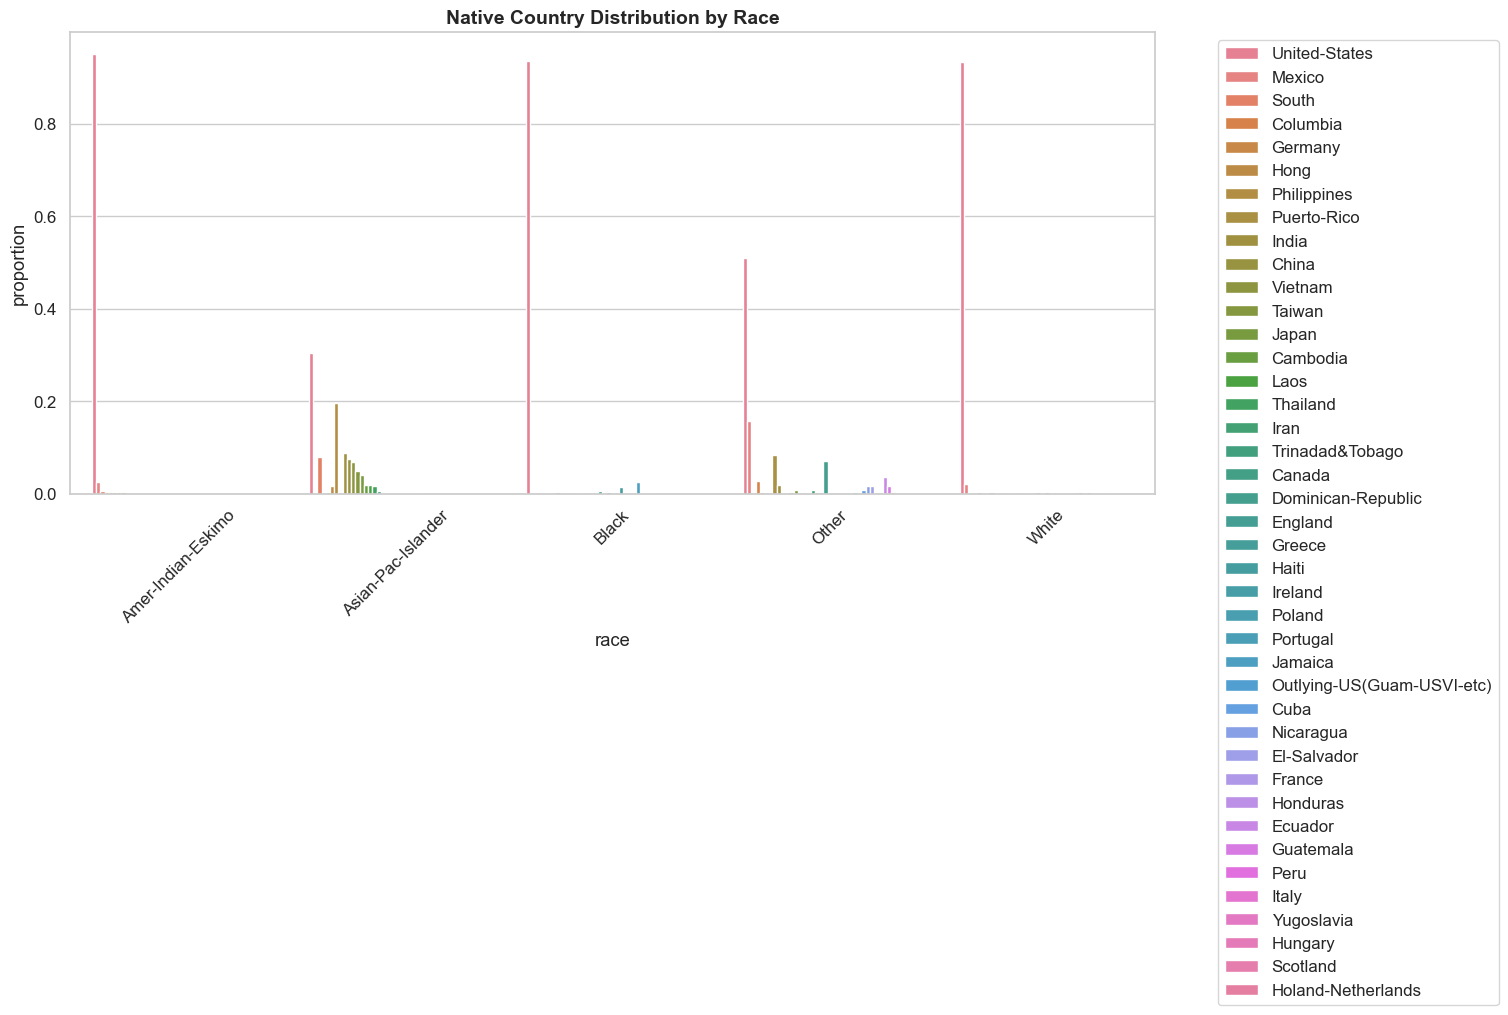

In [14]:
country_by_race = (
    data.groupby("race")["native-country"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=country_by_race,
    x="race",
    y="proportion",
    hue="native-country"
)
plt.title("Native Country Distribution by Race", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Top countries

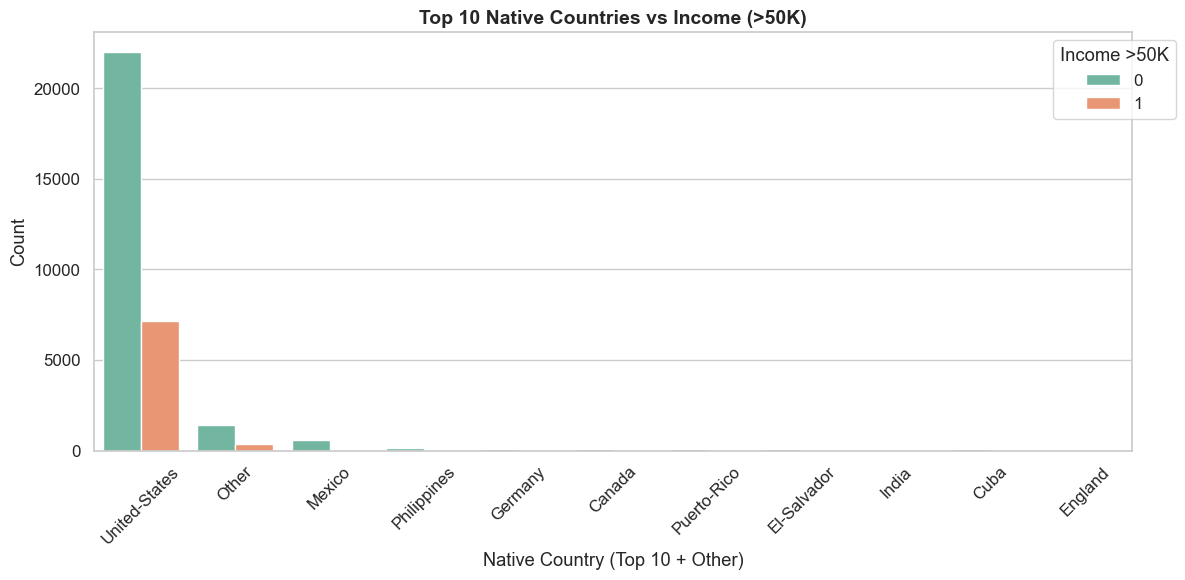

In [15]:

country_counts = data['native-country'].value_counts()


top_n = 10
top_countries = country_counts.nlargest(top_n).index


data['native-country-plot'] = data['native-country'].apply(
    lambda x: x if x in top_countries else 'Other'
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='native-country-plot',
    hue='income >50K',
    order=data['native-country-plot'].value_counts().index,
    palette='Set2'
)
plt.title(f"Top {top_n} Native Countries vs Income (>50K)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Native Country (Top 10 + Other)")
plt.ylabel("Count")
plt.legend(title="Income >50K", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## Group by Income or Race 

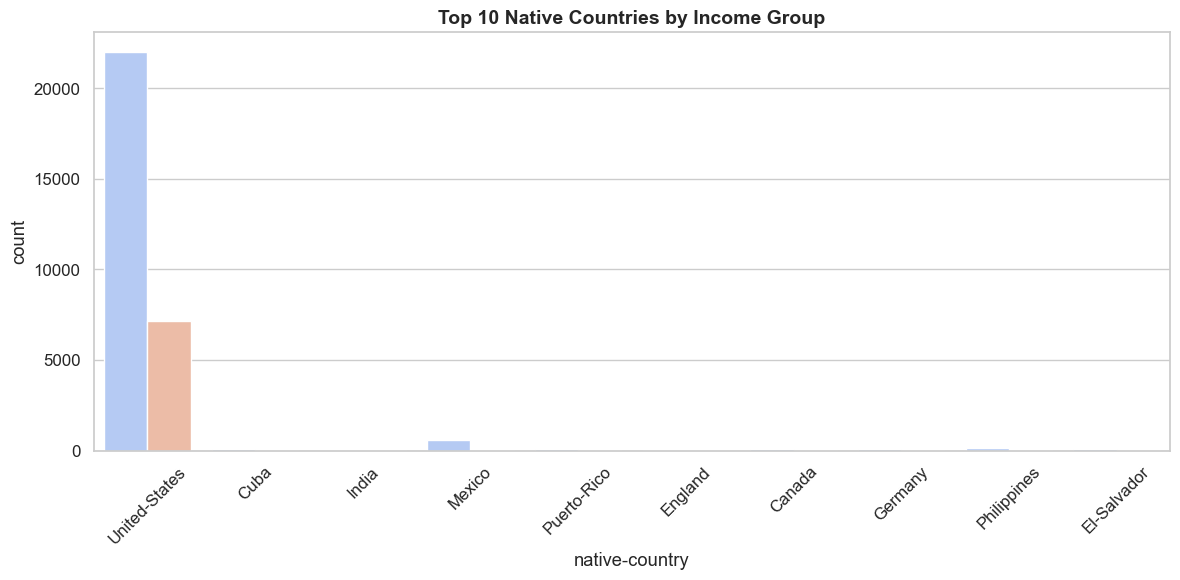

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[data['native-country'].isin(top_countries)],
    x='native-country',
    hue='income >50K',
    palette='coolwarm'
)
plt.title(f"Top {top_n} Native Countries by Income Group", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # hide legend
plt.tight_layout()
plt.show()


In [17]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'native-country-plot'],
      dtype='object')

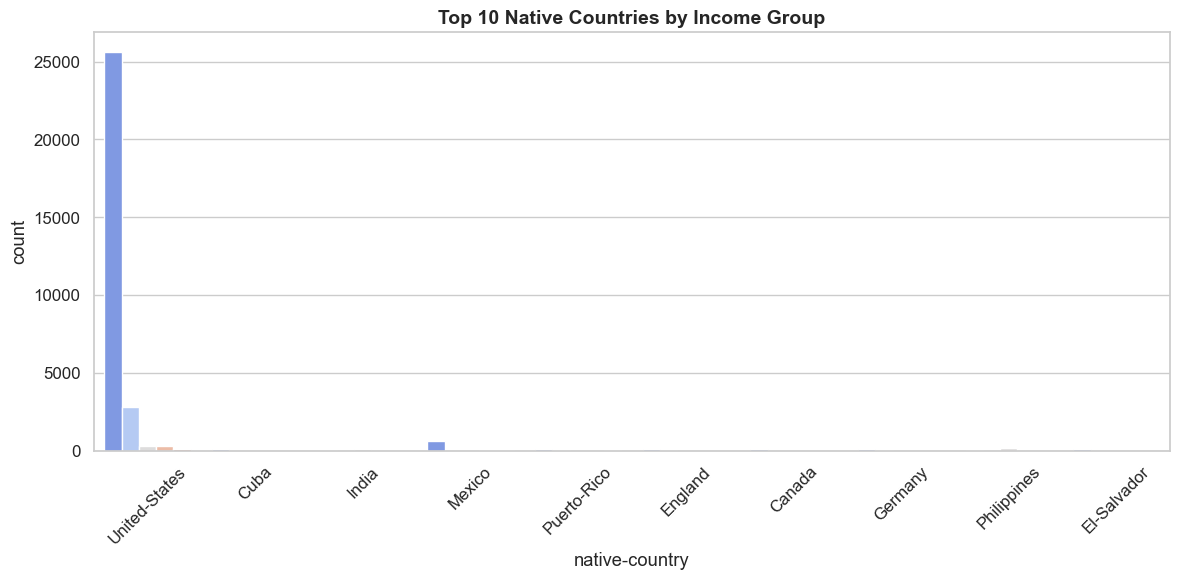

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[data['native-country'].isin(top_countries)],
    x='native-country',
    hue='race',
    palette='coolwarm'
)
plt.title(f"Top {top_n} Native Countries by Income Group", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # hide legend
plt.tight_layout()
plt.show()


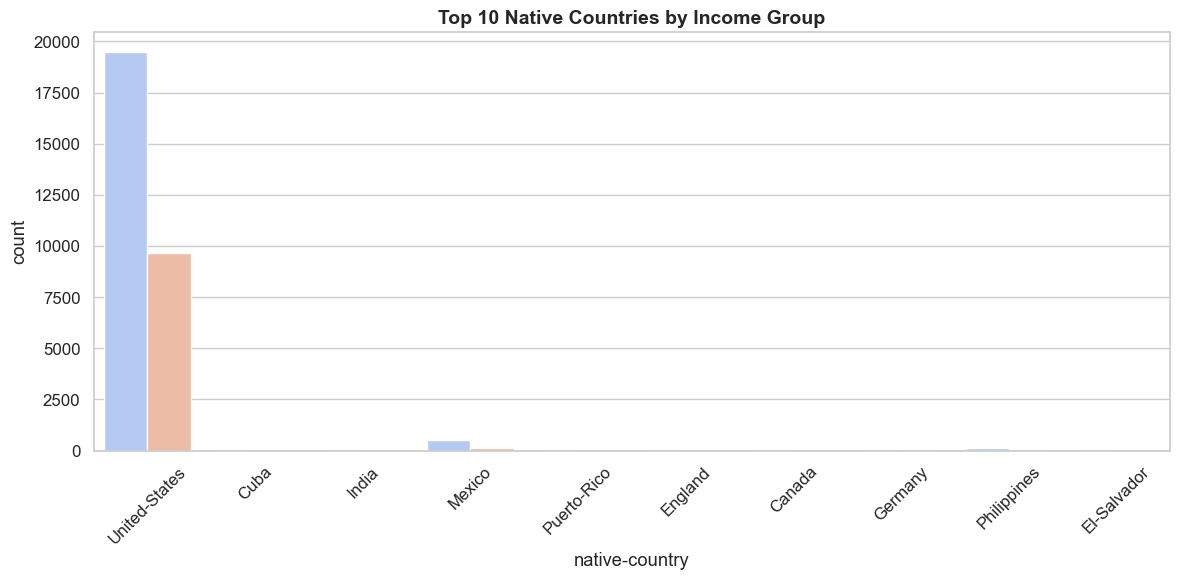

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[data['native-country'].isin(top_countries)],
    x='native-country',
    hue='sex',
    palette='coolwarm'
)
plt.title(f"Top {top_n} Native Countries by Income Group", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # hide legend
plt.tight_layout()
plt.show()

## Heatmap for Compact Visualization

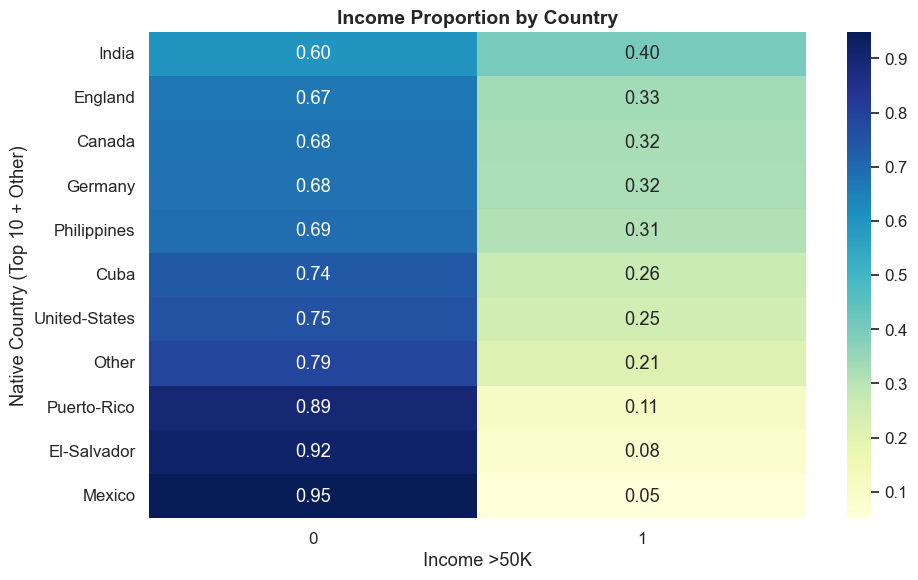

In [20]:
country_income = (
    pd.crosstab(data['native-country-plot'], data['income >50K'], normalize='index')
    .sort_values(by=1, ascending=False)
)

plt.figure(figsize=(10, 6))
sns.heatmap(country_income, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Income Proportion by Country", fontsize=14, fontweight='bold')
plt.xlabel("Income >50K")
plt.ylabel("Native Country (Top 10 + Other)")
plt.tight_layout()
plt.show()

## Filling the missing country

In [21]:
data['native-country'] = data.groupby('race')['native-country'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'United-States'
)

In [22]:
data.isnull().sum()

age                       0
workclass              1836
education                 0
education-num             0
marital-status            0
occupation             1843
relationship              0
race                      0
sex                       0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country            0
income >50K               0
native-country-plot       0
dtype: int64

## Check Missing Pattern for workclass

In [23]:
missing_workclass = data[data['workclass'].isnull()]
print(missing_workclass['income >50K'].value_counts(normalize=True))

income >50K
0    0.895969
1    0.104031
Name: proportion, dtype: float64


## Explore Relationships to Guide Imputation

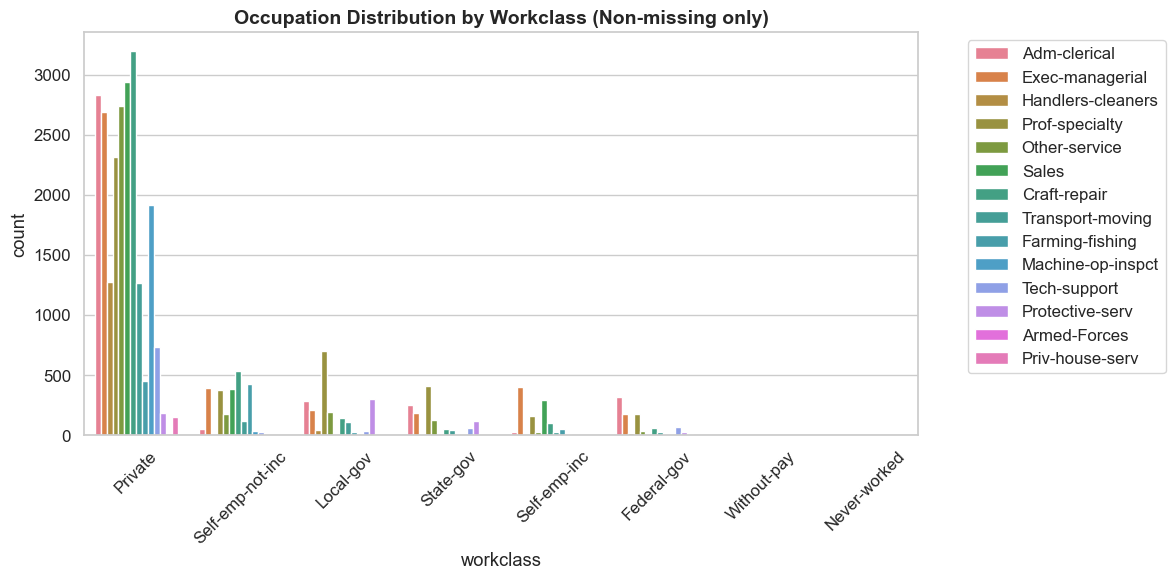

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[~data['workclass'].isnull()],
    x='workclass',
    hue='occupation',
    order=data['workclass'].value_counts().index,
)
plt.title("Occupation Distribution by Workclass (Non-missing only)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Workclass vs Education

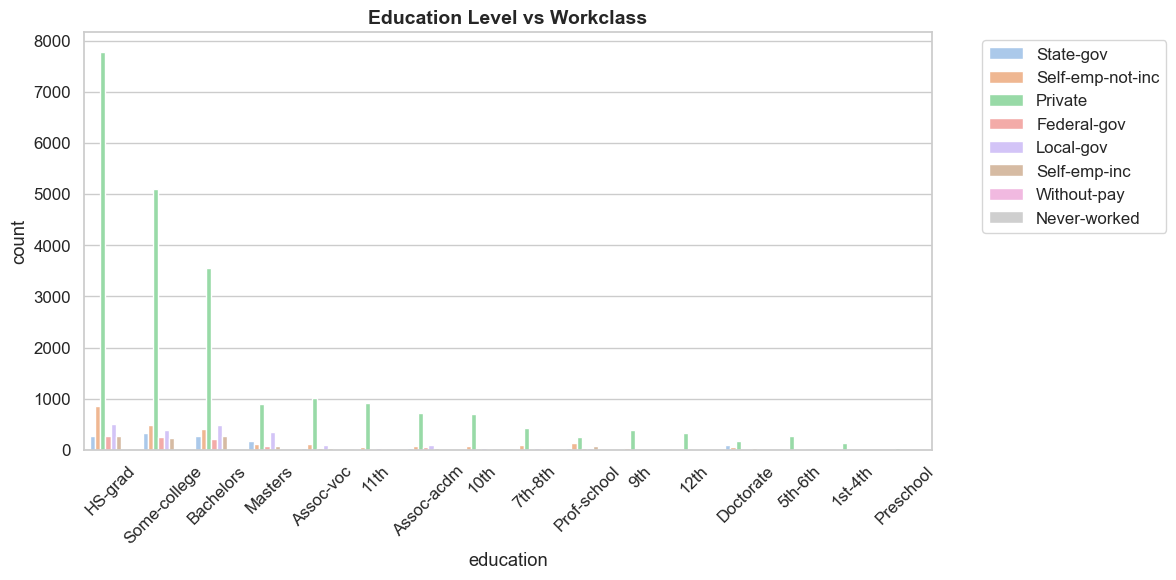

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[~data['workclass'].isnull()],
    x='education',
    hue='workclass',
    order=data['education'].value_counts().index
)
plt.title("Education Level vs Workclass", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Group-Based Summary for Filling Logic

In [26]:
workclass_by_occupation = (
    data.groupby("occupation")["workclass"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)
workclass_by_occupation


occupation
Adm-clerical             Private
Armed-Forces         Federal-gov
Craft-repair             Private
Exec-managerial          Private
Farming-fishing          Private
Handlers-cleaners        Private
Machine-op-inspct        Private
Other-service            Private
Priv-house-serv          Private
Prof-specialty           Private
Protective-serv        Local-gov
Sales                    Private
Tech-support             Private
Transport-moving         Private
Name: workclass, dtype: object

## fill missing workclass using occupation-based mode

In [27]:
def fill_workclass(row):
    if pd.isnull(row['workclass']):
        occ = row['occupation']
        if pd.notnull(occ) and occ in workclass_by_occupation:
            return workclass_by_occupation[occ]
        else:
            return 'Private'  
    else:
        return row['workclass']

data['workclass'] = data.apply(fill_workclass, axis=1)

In [28]:
data.isnull().sum()

age                       0
workclass                 0
education                 0
education-num             0
marital-status            0
occupation             1843
relationship              0
race                      0
sex                       0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country            0
income >50K               0
native-country-plot       0
dtype: int64

## Check how balanced the column looks now

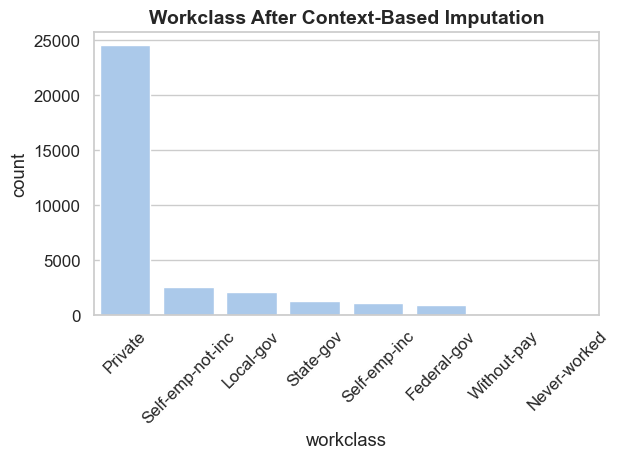

In [29]:
sns.countplot(x='workclass', data=data, order=data['workclass'].value_counts().index)
plt.title("Workclass After Context-Based Imputation", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
data['workclass'].isnull().sum()

0

## Visual Cross Check with Education

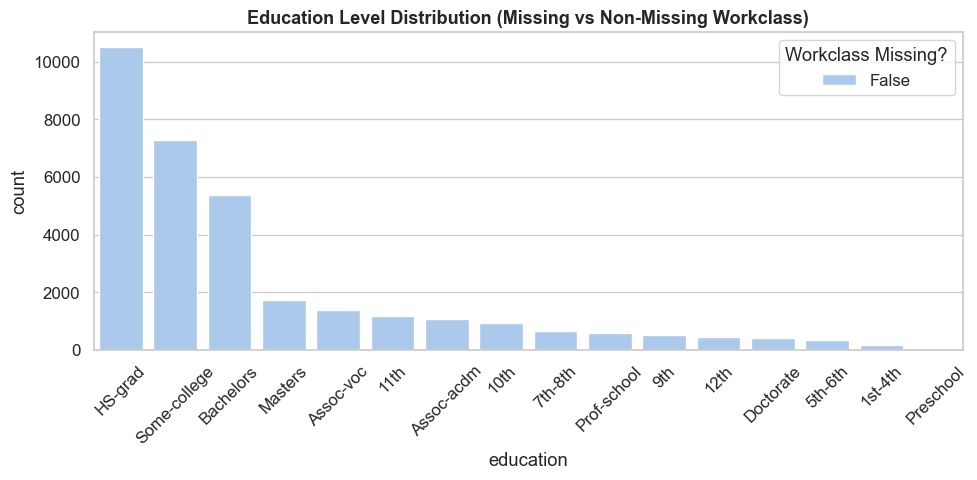

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=data,
    x='education',
    hue=data['workclass'].isnull(),
    order=data['education'].value_counts().index
)
plt.title("Education Level Distribution (Missing vs Non-Missing Workclass)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Workclass Missing?")
plt.tight_layout()
plt.show()


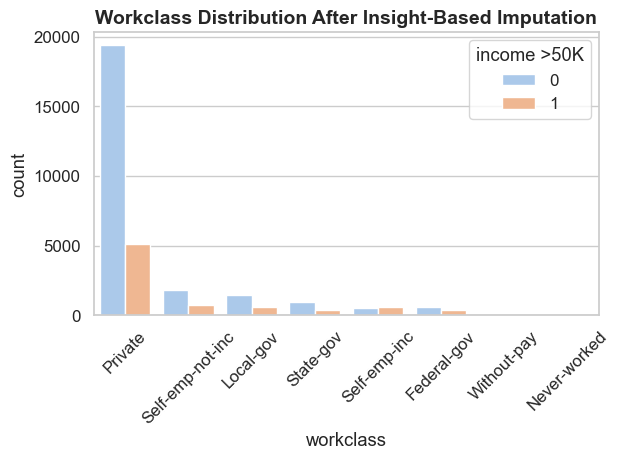

In [32]:
sns.countplot(x='workclass', hue='income >50K', data=data,
              order=data['workclass'].value_counts().index)
plt.title("Workclass Distribution After Insight-Based Imputation", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Filling missing values for occupation

In [33]:
missing_occ = data[data["occupation"].isnull()]
print(missing_occ["income >50K"].value_counts(normalize=True))
print("\nOverall income distribution:")
print(data["income >50K"].value_counts(normalize=True))

income >50K
0    0.896365
1    0.103635
Name: proportion, dtype: float64

Overall income distribution:
income >50K
0    0.75919
1    0.24081
Name: proportion, dtype: float64


## Cross-tab to Identify Patterns

In [34]:
pd.crosstab(
    data["workclass"],
    data["occupation"].isnull(),
    normalize="index"
).sort_values(by=True, ascending=False)


occupation,False,True
workclass,,
Never-worked,0.000000,1.000000
Private,0.925159,0.074841
Federal-gov,1.000000,0.000000
Local-gov,1.000000,0.000000
Self-emp-inc,1.000000,0.000000
Self-emp-not-inc,1.000000,0.000000
State-gov,1.000000,0.000000
Without-pay,1.000000,0.000000


## Explore Occupation Patterns by Workclass and Income

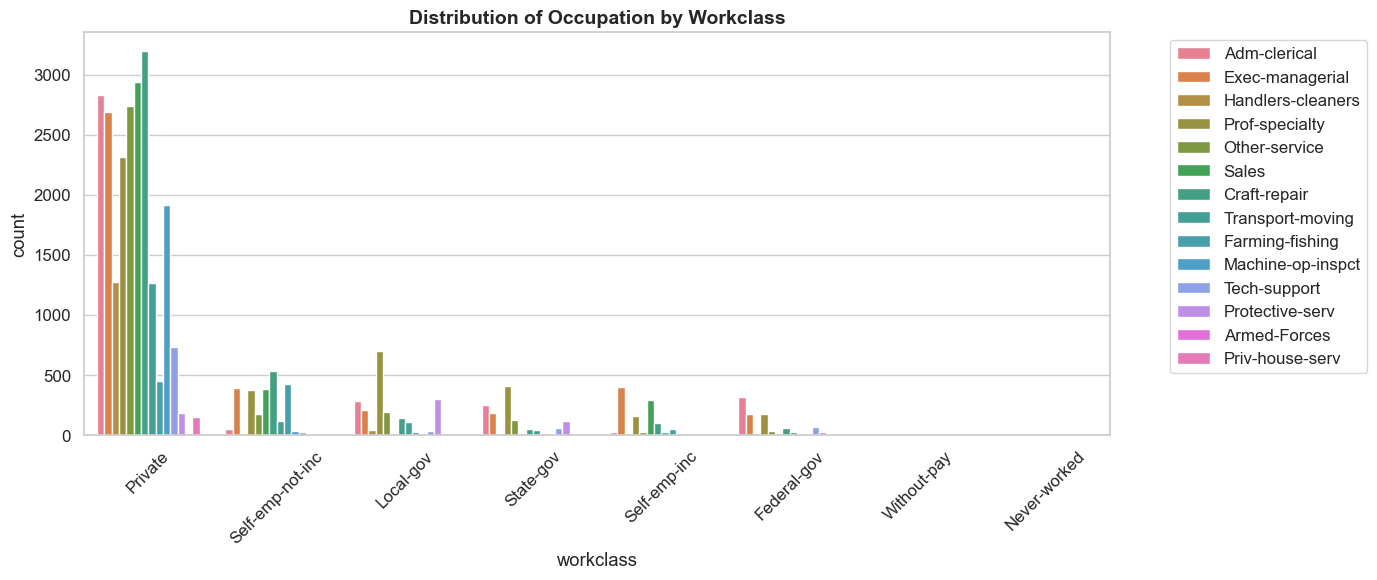

In [35]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=data[~data['occupation'].isnull()],
    x='workclass',
    hue='occupation',
    order=data['workclass'].value_counts().index
)
plt.title("Distribution of Occupation by Workclass", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Occupation per Workclass

In [36]:
occupation_by_workclass = (
    data.groupby("workclass")["occupation"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)
occupation_by_workclass

workclass
Federal-gov            Adm-clerical
Local-gov            Prof-specialty
Never-worked                    NaN
Private                Craft-repair
Self-emp-inc        Exec-managerial
Self-emp-not-inc       Craft-repair
State-gov            Prof-specialty
Without-pay         Farming-fishing
Name: occupation, dtype: object

## Fill Missing Occupations Using Workclass

In [37]:
def fill_occupation(row):
    if pd.isnull(row["occupation"]):
        wc = row["workclass"]
        if pd.notnull(wc) and wc in occupation_by_workclass.index:
            return occupation_by_workclass[wc]
        else:
            return "Other-service"  
    else:
        return row["occupation"]

data["occupation"] = data.apply(fill_occupation, axis=1)

## Visualize to confirm balance

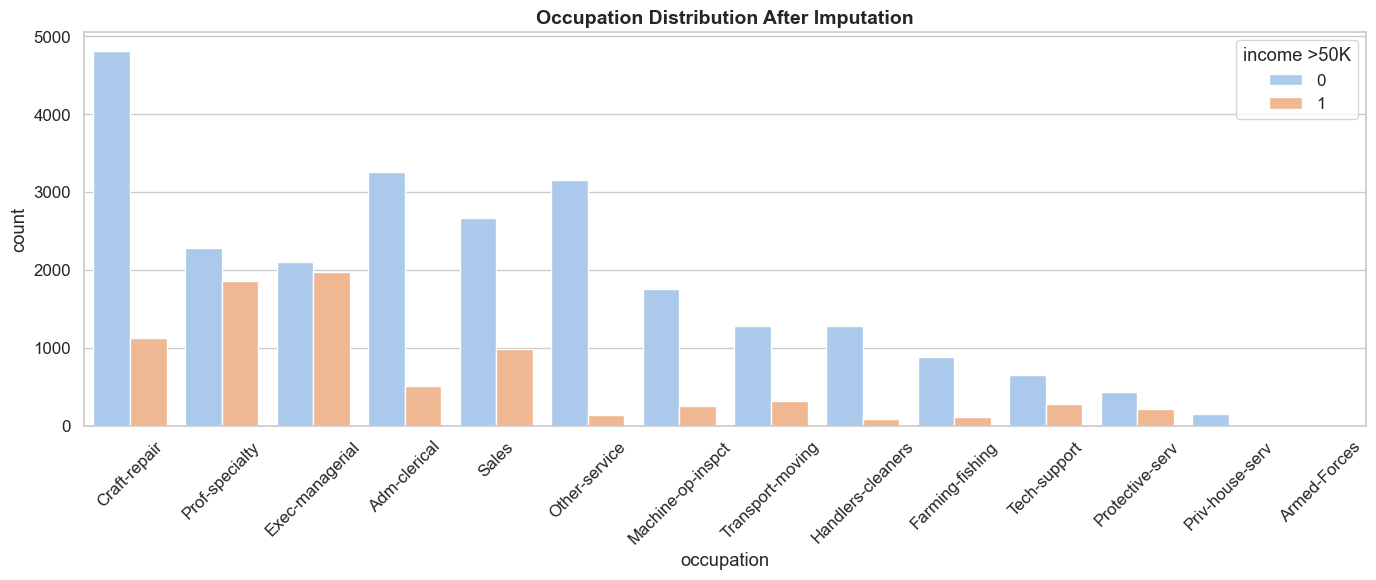

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=data,
    x="occupation",
    hue="income >50K",
    order=data["occupation"].value_counts().index
)
plt.title("Occupation Distribution After Imputation", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
pd.crosstab(data["workclass"], data["occupation"], normalize="index").round(2)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,0.33,0.01,0.07,0.19,0.01,0.02,0.01,0.04,0.00,0.18,0.03,0.01,0.07,0.03
Local-gov,0.14,0.00,0.07,0.10,0.01,0.02,0.01,0.09,0.00,0.34,0.15,0.00,0.02,0.05
Private,0.12,0.00,0.21,0.11,0.02,0.05,0.08,0.11,0.01,0.09,0.01,0.12,0.03,0.05
Self-emp-inc,0.03,0.00,0.09,0.36,0.05,0.00,0.01,0.02,0.00,0.14,0.00,0.26,0.00,0.02
Self-emp-not-inc,0.02,0.00,0.21,0.15,0.17,0.01,0.01,0.07,0.00,0.15,0.00,0.15,0.01,0.05
State-gov,0.19,0.00,0.04,0.15,0.01,0.01,0.01,0.10,0.00,0.32,0.09,0.01,0.04,0.03
Without-pay,0.21,0.00,0.07,0.00,0.43,0.07,0.07,0.07,0.00,0.00,0.00,0.00,0.00,0.07


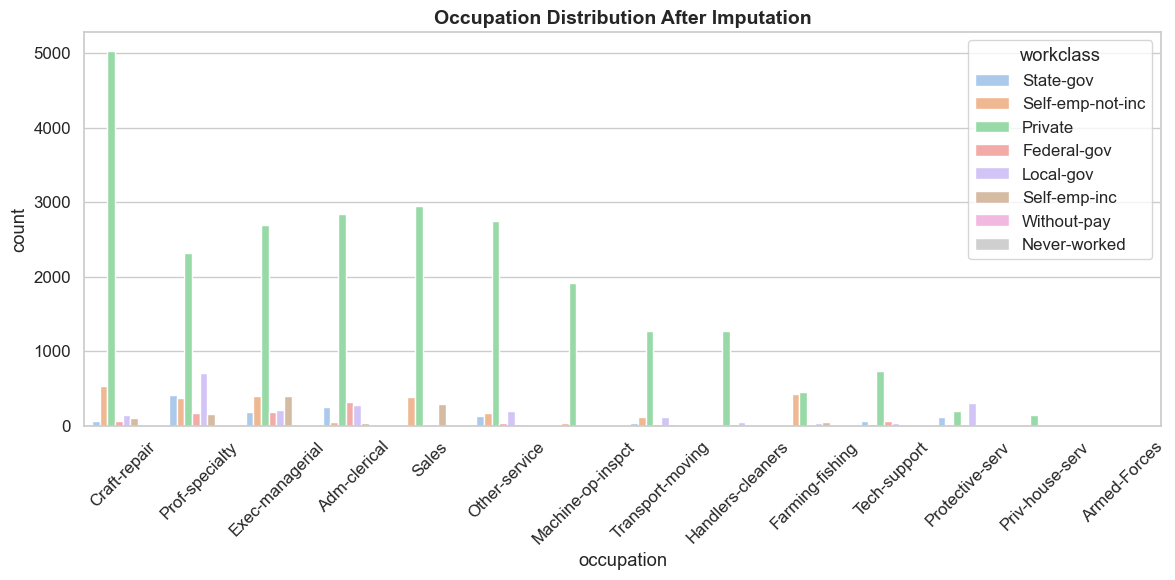

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x="occupation",
    hue="workclass",
    order=data["occupation"].value_counts().index
)
plt.title("Occupation Distribution After Imputation", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,native-country-plot
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,United-States


In [42]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'native-country-plot'],
      dtype='object')

In [43]:
data = data.drop(columns = ['education', 'relationship','native-country-plot'], axis = 1)
data = data.dropna()
data

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,0


In [44]:
data = pd.get_dummies(data, columns=['sex'], drop_first=True, dtype = int)

In [45]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['workclass', 'marital-status', 'occupation', 'race', 'native-country']

In [46]:
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [47]:
data

,age,workclass,education-num,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income >50K,sex_Male
0,39,5,13,4,0,4,2174,0,40,38,0,1
1,50,4,13,2,3,4,0,0,13,38,0,1
2,38,2,9,0,5,4,0,0,40,38,0,1
3,53,2,7,2,5,2,0,0,40,38,0,1
4,28,2,13,2,9,2,0,0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,4,0,0,38,38,0,0
32557,40,2,9,2,6,4,0,0,40,38,1,1
32558,58,2,9,6,0,4,0,0,40,38,0,0
32559,22,2,9,4,0,4,0,0,20,38,0,1


In [48]:
data.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
race              0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
sex_Male          0
dtype: int64

In [49]:
data['income >50K'].value_counts(normalize=True)

income >50K
0    0.759139
1    0.240861
Name: proportion, dtype: float64

In [50]:
data.corr(numeric_only=True)['income >50K'].sort_values(ascending=False)

income >50K       1.000000
education-num     0.335103
age               0.233931
hours-per-week    0.229634
capital-gain      0.223319
sex_Male          0.216021
capital-loss      0.150506
race              0.071824
occupation        0.065792
native-country    0.023091
workclass         0.022658
marital-status   -0.199294
Name: income >50K, dtype: float64

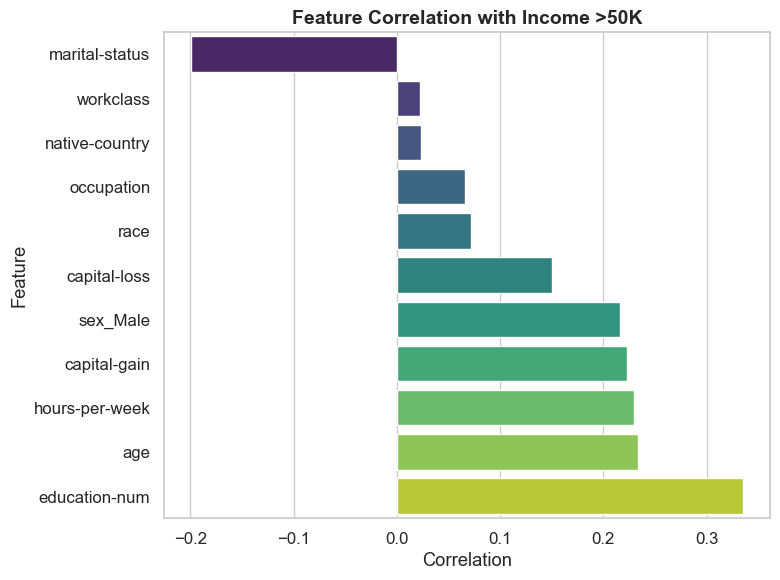

In [51]:
corr = data.corr(numeric_only=True)['income >50K'].drop('income >50K').sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.index,        # assign hue explicitly
    palette="viridis",
    dodge=False,
    legend=False           # hide legend (since y already labels categories)
)
plt.title("Feature Correlation with Income >50K", fontsize=14, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [52]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'race', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income >50K', 'sex_Male'],
      dtype='object')

In [53]:
feature_columns = ['age', 'workclass', 'education-num', 'marital-status',
                   'occupation', 'race', 'capital-gain', 'capital-loss',
                   'hours-per-week', 'native-country', 'sex_Male']
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [54]:
X = data.drop('income >50K', axis = 1)
y = data['income >50K']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

In [56]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

In [57]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} accuracy: {accuracy*100:.2f} %")

Training Logistic Regression ---
Logistic Regression accuracy: 76.26 %
Training Decision Tree ---
Decision Tree accuracy: 81.57 %
Training Random Forest ---
Random Forest accuracy: 84.43 %
Training SVM ---
SVM accuracy: 78.90 %
Training Naive Bayes ---
Naive Bayes accuracy: 79.63 %


In [58]:
sorted_result = sorted(results.items(), key = lambda x: x[1], reverse = True)
for model_name, accuracy in sorted_result:
    print(f"{model_name}: {accuracy*100:.2f} %")

Random Forest: 84.43 %
Decision Tree: 81.57 %
Naive Bayes: 79.63 %
SVM: 78.90 %
Logistic Regression: 76.26 %


In [59]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators":[50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split":[2, 5, 10]
}

In [60]:
grid_search = GridSearchCV(RandomForestClassifier(), param, cv= 5, n_jobs = 1, verbose = 1)
grid_search.fit(X_train, y_train)
print(f"Best parameters for random forest classifier are {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for random forest classifier are {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [61]:
best_model = grid_search.best_estimator_
cvscores = cross_val_score(best_model, X_scaled, y, cv = 5)
print(f"The cross validation score for Random Forest Classifier are: {cvscores}")

The cross validation score for Random Forest Classifier are: [0.8616188  0.8626939  0.86315466 0.87206266 0.86927803]


In [62]:
print(f"The mean Cross validation score of Random Forest Classifier is {cvscores.mean()}")

The mean Cross validation score of Random Forest Classifier is 0.8657616119807647


In [63]:
joblib.dump(best_model, "income_prediction_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [64]:
import pkg_resources
libs = ["pandas", "numpy", "seaborn", "matplotlib", "scikit-learn", "joblib", "math"]
with open("requirements.txt", "w") as f:
    for lib in libs:
        try:
            version = pkg_resources.get_distribution(lib).version
            f.write(f"{lib}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"{lib} is not installed in this environmnet.")

math is not installed in this environmnet.


In [65]:
!type requirements.txt

pandas==2.2.2
numpy==1.26.4
seaborn==0.13.2
matplotlib==3.8.4
scikit-learn==1.4.2
joblib==1.4.2
